<div align="center"><h1><font color='darkblue'>Evaluation Project-6</div>

<div align="center"><h2><font color='Red'><u>Media Sales Project</div>

<h2><font color='red'><u>Abstract Summary</u></font></h2><br><h5><font color='grey'>1. Given the data set, we were to make a sales prediction based on the features given.
<br>2. There was a nominal column in the data set and a couple of outliers, which were cleared using the zscore technique.
<br>3. From the EDA it was predicted that the 'Newspaper' column maybe unnecessary to achieve better sales and hence predictions.
<br>4. Models were built in both situations, with and without the newspaper, it was seen that, results of the iteration without the newspape column, were more favorable.
<br>5. A best fit line was plot.

<div align="center"><h3><font color='maroon'><u>Python Implementation</div>

In [25]:
#Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import zscore

#preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model Training 
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv",header=0)

In [3]:
data.shape

(200, 5)

In [4]:
data.sample(10)

,Unnamed: 0,TV,radio,newspaper,sales
73,74,129.4,5.7,31.3,11.0
84,85,213.5,43.0,33.8,21.7
1,2,44.5,39.3,45.1,10.4
34,35,95.7,1.4,7.4,9.5
115,116,75.1,35.0,52.7,12.6
140,141,73.4,17.0,12.9,10.9
128,129,220.3,49.0,3.2,24.7
60,61,53.5,2.0,21.4,8.1
195,196,38.2,3.7,13.8,7.6
18,19,69.2,20.5,18.3,11.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<h3><font color='red'><u>Inferences:</u></font></h2>
    <h4>1. Nominal data called 'Unnamed:0' is the serial number and can be removed.
    <br>2. All Values seem to be there.
    <br>3. No Nan or missing values.
    <br>4. The std deviation seems to be high for all columns, seem to indicate outliers.
    <br>5. the newspaper values show a huge leap through the quartiles, it is seen with the others too, but not as much. we will know as we indicate further, when we look at the data set visually.

<h2><font color='red'><u>Visual Study

In [8]:
#creating functions 
def Cont_plots(dfrme,feature_n):
  
     
    fig, ax = plt.subplots(ncols= 2, figsize = (9,4))    
    
    sns.histplot(x=feature_n,data=data,kde=True,ax=ax[0])
    ax[0].set_title("Expenditure for marketing via "+feature_n+"")
    ax[0].set_label("Cost")
    #distribution plot
    
  
    
    
     #boxplot for comparison
    sns.boxplot(data=dfrme[feature_n], ax=ax[1])
    ax[1].set_title("Boxplot for expenditure for marketing via" + feature_n )
    plt.show()

<h3><font color='darkgreen'><u>1. TV 

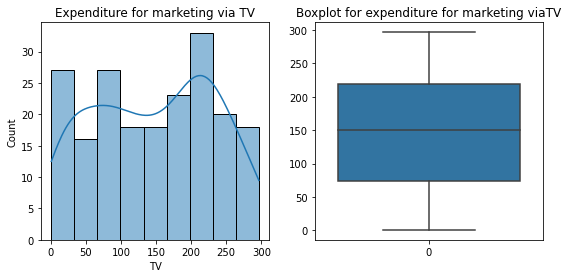

In [9]:
Cont_plots(data,feature_n='TV')

<h3><font color='darkgreen'><u>2. Radio

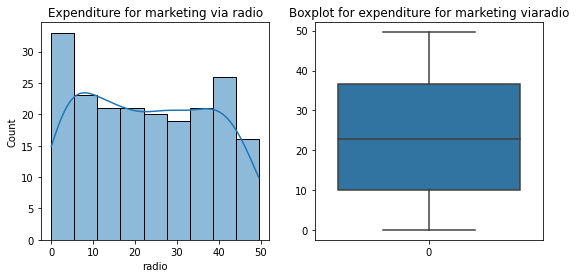

In [10]:
Cont_plots(data,feature_n='radio')

<h3><font color='darkgreen'><u>3. Newspaper 

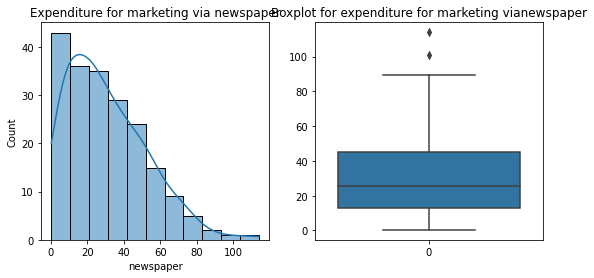

In [11]:
Cont_plots(data,feature_n='newspaper')

Inferences:
1. We see that only the newspaper feature has a couple of outliers, which we will remove.
2. at this stage we will also drop the nominal data.

<h3><font color='darkgreen'><u>Preprocessing

In [12]:
#Dropping "Unnamed: 0"
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Next find the z score to remove all the rows with z score above abs(3)

In [13]:
#calculating z score
before=data.size
data_temp=data
z=np.abs(zscore(data_temp))
#setting Threshold and removing outliers
thresh=3
data_temp=data_temp[(z<thresh).all(axis=1)]
after=data_temp.size

In [16]:
#Dataset has been cleaned, lets look at the size of the Data frame now.
print(f'The size of dataframe before removal of outliers ',before[0],'rows x',before[1],' columns')
print(f'The size of dataframe after removal of outliers ',after[0],'rows x',after[1],' columns')

The size of dataframe before removal of outliers  200.0 rows x4 columns
The size of dataframe after removal of outliers  198.0 rows x4 columns


In [17]:
#Lets rename the final cleaned up dataframe as 
data_final=data_temp
data_final

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Now that outliers have been removed and the final data set is ready, we can conduct the final step of the EDA by plotting a heatmap to understand interfeature and feature label relationships

<AxesSubplot:>

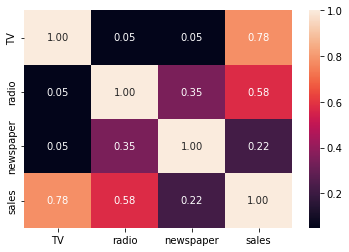

In [18]:
# Calculate correlations
corr = data_final.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

Inferences

1.Target Sales is most directly correlated with TV, a little with Radio and has  no correlation with Newspaper.
2.There is no correlation seems between all features.


<h4><font color='green'><u>Lets split the data for Model training

In [111]:
X=data_final.drop(['sales'],axis=1)
y=data_final['sales']
sclar = StandardScaler()
X=sclar.fit_transform(X)

In [112]:
#For Predicion no 2, let us remove Newspaper and check 
X1=data_final.drop(['sales','newspaper'],axis=1)
y1=data_final['sales']
#scaling X1
sclar = StandardScaler()
X1=sclar.fit_transform(X1)

Modeling

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)
LR= LinearRegression( fit_intercept = True)

LR.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = LR.predict(X_test)
r2_score(y_test, y_pred)

0.8989454779619588

In [115]:
#iteration2
X_train2, X_test2, y_train2, y_test2 = train_test_split( X1, y1 , test_size = 0.2, random_state = 42)

#Modelling
LR2= LinearRegression( fit_intercept = True)

LR2.fit(X_train2, y_train2)

LinearRegression()

In [117]:
y_pred2 = LR2.predict(X_test2)
r2_score(y_test2, y_pred2)

0.9028883880054273

<h3><font color='red'>1. Hence we can say that removing the investment in the newspaper would increase the sales. 
<br>2. As of now, we are getting an r2_score of 0.90288 with the second iteration, viz the data without the newspaper column, vs, with the newspaper, we are getting about 0.8989...hence we can say, that investment in newspaper maybe unnecessary for the improvement in sales. 
<br>3. Next let us look at improving the prediction accuracy of the model and also checking the metrics for the same.


In [124]:
#Lets look at the slope and intercept of the line our Best regression parameters makes.
print(f"Linear coefficients : {LR2.coef_}")
print(f"Intercept : {LR2.intercept_}")

Linear coefficients : [3.85808339 2.74404851]
Intercept : 13.984682280064671


In [125]:
#Lets look at the Root Mean Squared Error

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Root Mean Squared Error: 1.622950388425351


Lets move on to Hyper Parameter tuning

LassoCV

In [165]:
Lasscv=LassoCV(alphas=None,max_iter=300,normalize=True)
Lasscv.fit(X_train2,y_train2)

C:\Users\Glenn\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(max_iter=300, normalize=True)

In [166]:
#Best learning Rate
alpha=Lasscv.alpha_
alpha

0.0003204039956864193

In [167]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train2,y_train2)

Lasso(alpha=0.0003204039956864193)

In [168]:
lasso_reg.score(X_test2,y_test2)

0.9028794366276087

Ridge CV

In [169]:
ridgecv=RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(X_train2, y_train2)

C:\Users\Glenn\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [170]:
ridgecv.alpha_

0.001

In [171]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train2, y_train2)

Ridge(alpha=0.001)

In [172]:
ridge_model.score(X_test2, y_test2)

0.9028878128201975

HYPER PARAMETER TUNING

In [176]:
ridge_params = {'alpha':[0.0005,0.00075,0.001,0.002,0.008,0.02,0.2,0.5,0.75,0.8,1,2,20]}
grid = GridSearchCV(Ridge(), ridge_params, cv=3)
grid_result=grid.fit(X_train2, y_train2)

print('Best score:', grid_result.best_params_)
print('Best score:', grid_result.best_estimator_)

Best score: {'alpha': 0.0005}
Best score: Ridge(alpha=0.0005)


In [177]:
alpha = [0.0005] 
#fitting model
ridge_model=RidgeCV(alphas=alpha,cv=3)
ridge_model.fit(X_train2, y_train2)

RidgeCV(alphas=[0.0005], cv=3)

In [178]:
ridge_model.score(X_test2, y_test2)

0.9028881004190754

In [179]:
y_pred_by_lasso =  lasso_reg.predict(X_test2)
y_pred_by_ridge = ridge_model.predict(X_test2)
y_pred_by_LR=LR2.predict(X_test2)

mse_lasso=mean_squared_error(y_test2,y_pred_by_lasso)
mse_ridge=mean_squared_error(y_test2,y_pred_by_ridge)
mse_LR=mean_squared_error(y_test2,y_pred_by_LR)

print(f'Logistic Reg: {np.sqrt(mse_LR)}')
print(f'Lasso RMSE: {np.sqrt(mse_lasso)}')
print(f'Ridge RMSE: {np.sqrt(mse_ridge)}')

Logistic Reg: 1.622950388425351
Lasso RMSE: 1.623025185388602
Ridge RMSE: 1.6229527915264124


In [180]:
#showing the Predictions of all Predictions along with actual values
best_fit=pd.DataFrame({"LR":y_pred_by_LR,"Lasso":y_pred_by_lasso,"Ridge":y_pred_by_ridge,"Actual":y_test2})
best_fit.sample(10)

,LR,Lasso,Ridge,Actual
25,15.611677,15.611665,15.611672,12.0
119,6.902637,6.903230,6.902658,6.6
142,19.189829,19.189371,19.189814,20.1
86,11.607070,11.607233,11.607078,12.0
70,17.739824,17.739493,17.739813,18.3
128,22.105385,22.104610,22.105361,24.7
158,10.422700,10.422902,10.422712,7.3
77,13.793028,13.793015,13.793029,14.2
19,14.154748,14.154733,14.154748,14.6
83,14.396183,14.396033,14.396182,13.6


<h3><font color='green'><u>Lets look at the best fit line with the Ridge CV predictions.

<AxesSubplot:xlabel='sales'>

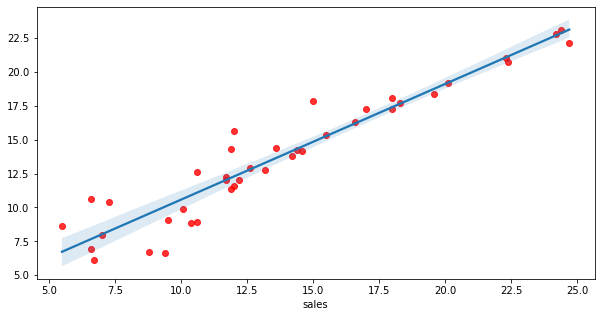

In [181]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred_by_ridge,scatter_kws={'color':'red'})


<h4><font color='grey'>The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best fit line.

<h3><font color='red'>Hence we can say that removing the investment in the newspaper would increase the sales. 

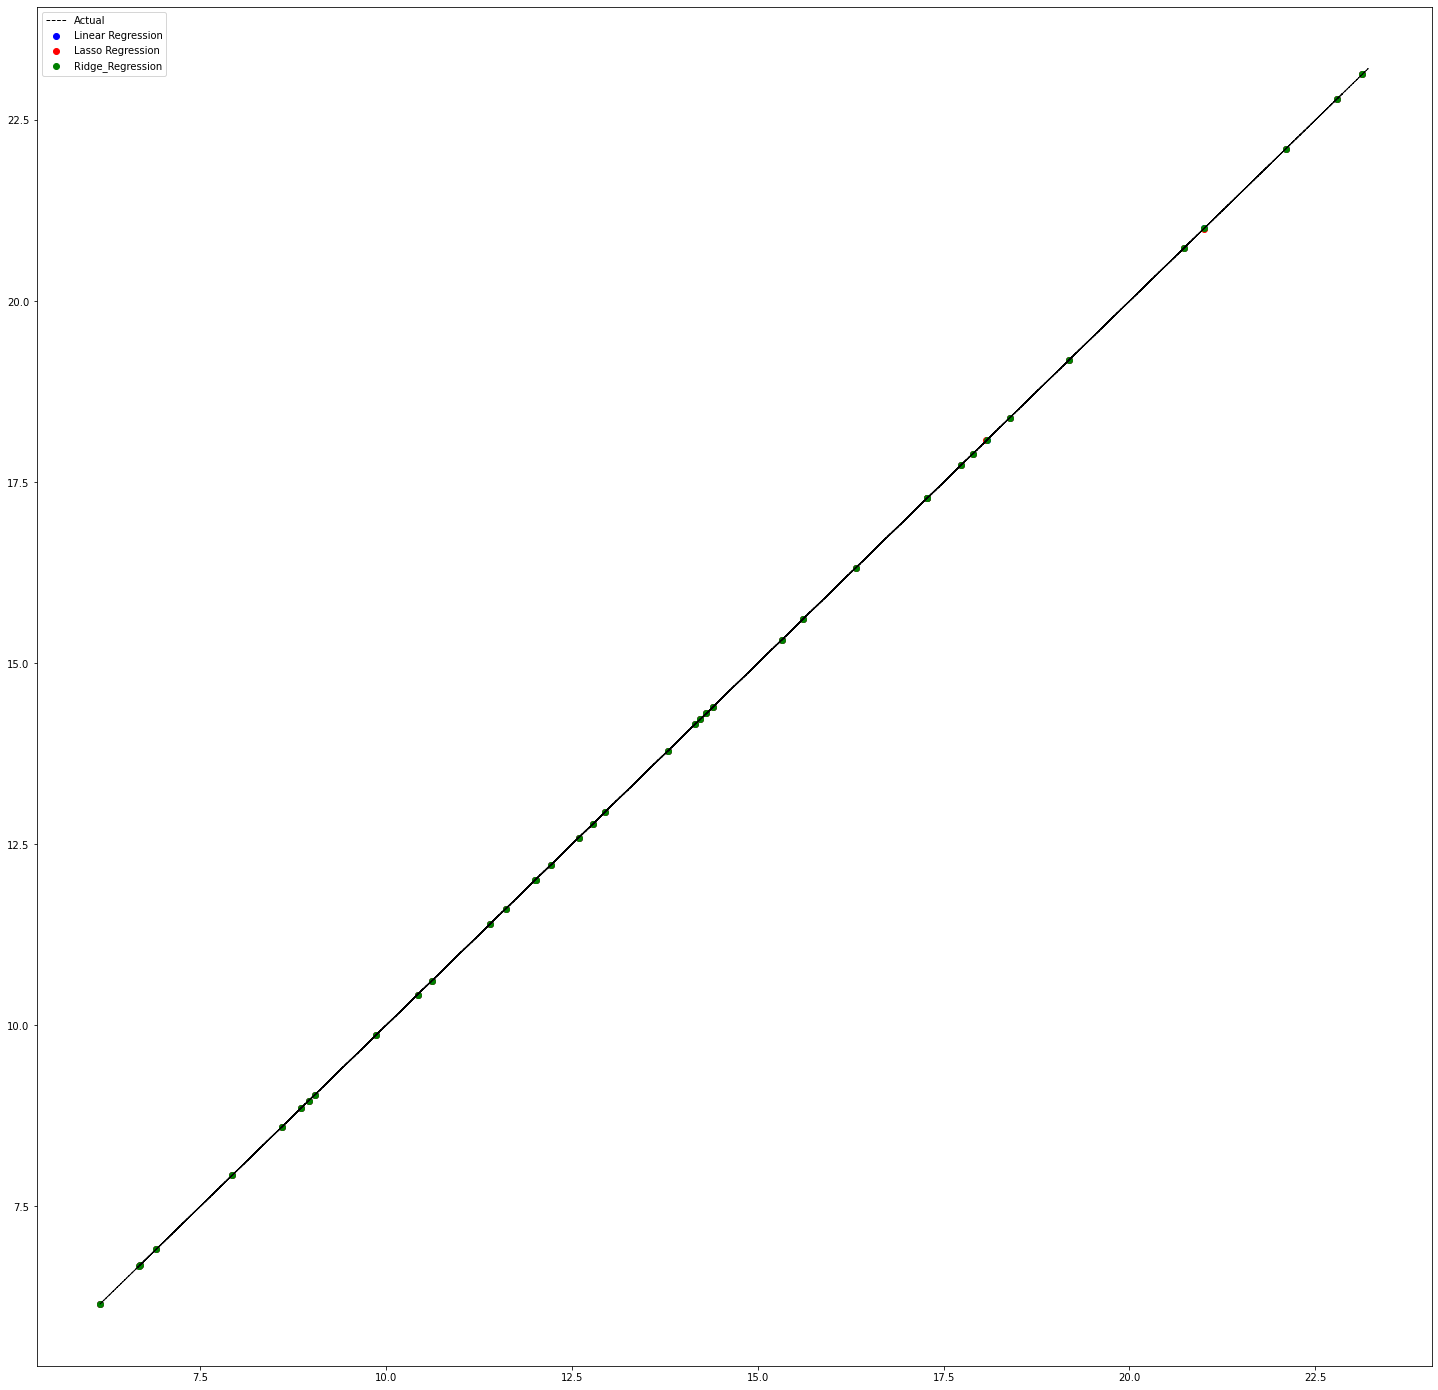

In [182]:
#define data
plt.figure(figsize=(25,25))

x1 = y_pred_by_LR
x2 = y_pred_by_lasso
x3 = y_pred_by_ridge
x4 = y_pred

#find line of best fit
a1, b1 = np.polyfit(x1, x1, 1)
a2, b2 = np.polyfit(x2, x2, 1)
a3, b3 = np.polyfit(x3, x3, 1)
a4, b4 = np.polyfit(x4, x4, 1)
#add points to plot

plt.scatter(x1, x1,color='blue', label='Linear Regression')
plt.scatter(x2, x2,color='red', label='Lasso Regression')
plt.scatter(x3, x3,color='green', label='Ridge_Regression')


#add line of best fit to plot
plt.plot(x4, a4*x4+b4, color='black',linestyle='--', linewidth=1, label='Actual')
#plt.plot(x1, a1*x1+b1, color='blue')
#plt.plot(x2, a2*x2+b2, color='red')
#plt.plot(x3, a3*x3+b3, color='green')
plt.legend()



In [184]:
# summary: after removing the newspaper column.
r2_Score_LR = r2_score(y_test, y_pred)
r2_Score_Lasso = r2_score(y_test, y_pred_by_lasso)
r2_Score_RidgeCV = r2_score(y_test, y_pred_by_ridge)
print(f'Logistic Reg R2: {r2_Score_LR }')
print(f'Lasso R2: {r2_Score_Lasso}')
print(f'Ridge R2: {r2_Score_RidgeCV}')

Logistic Reg R2: 0.8989454779619588
Lasso R2: 0.9028794366276087
Ridge R2: 0.9028881004190754


<h2>Summary placed in the beginning of the report as "Abstract"